In [1]:
#import the packages
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

<h1>Extract File</h1> 

In [2]:
#define the file path
string_file= 'Dataset/nsynth-train/audio/string_acoustic_000-024-025.wav'

#Store class names in array
class_names=['bass', 'brass', 'flute', 'guitar', 
             'keyboard', 'mallet', 'organ', 'reed', 
             'string', 'synth_lead', 'vocal']
#Store source names in array
source_names=['acoustic', 'electronic', 'synthetic']


#load the waveform y and sampling rate s
y, sr = librosa.load(string_file, sr=None)
print(y)
print(sr)

hop_length = 512

[-6.1035156e-05 -3.9672852e-04  2.8381348e-03 ...  0.0000000e+00
  0.0000000e+00  0.0000000e+00]
16000


# Music Information Retrieval (MIR)
## Feature Extraction
#### Mel Spec and MFCC
Mel Spectrogram and Mel Frequency cepstrum
_Mel Spectrum_: is an intensity plot of a short-time fourier transform. 

_Mel Frequency Cepstrum_: MFCC contains multiple coefficients. In this case, the coefficients are defined by n_mfcc=13. Generally, 20 to 40 coefficients are taken of the MFCC, however 12 coefficients are usually enough to display the sound wave accurately. MFCC is the fast fourier transform of the power spectrum. 

#### Chromagrams
_Chromagrams_: the 12 vectors representing the western scale.

_Constant Q_: Summarize energy of semitone bands into scalar values

_Constant Energy Normalize_: CENS is the sound seperated by the pitch and height, the chromatic quality and the octave of the pitch.

#### Spectral Analysis
_Spectral Contrast_: measures the difference between the valleys and peaks of the spectrum in the sub-bands.

_Spectral Centroid_: can be useful in timbre classification and determining the "brightness" of the sounds.

_Spectral Bandwidth_: The resolution of the spectrum

_Spectral Rolloff_: The fraction of bins in the power spectrum at which 85% of the power is at lower frequencies.

_Spectral Flatness_: Indicates how flat the spectrum of sound is, displays white noise.  

#### Other
_Zero Crossing Rate_: is when successive samples have different signs. This can provide a simple measure of the frequency of the sine wave. 

_Root Mean Square_: energy of the signal

_Onset_: The beginning of a musical note or sound. 


##### Sources
Below are sources used in definitions and determining relevant features, a more in-depth look at features chosen and sources used can be found in the Progress Report pdf.

[LibROSA](https://librosa.github.io/librosa/index.html)

[MFCC, Mel Spec, Chroma Constant Q](https://www2.ak.tu-berlin.de/~akgroup/ak_pub/abschlussarbeiten/2018/Seipel_MasA.pdf)

[MFCC, Constant Q Transform](https://jamesowers.github.io/files/thesis.pdf)

[Analysis of MFCC Coefficients](http://www.haskins.yale.edu/sr/SR061/SR061_14.pdf)

[MFCC, Zero Crossing Rate](https://ieeexplore.ieee.org/document/1221608)
[MFCC and Energy](https://web.archive.org/web/20070510193153if_/http://cemnet.ntu.edu.sg:80/home/asltchia/publication/AudioAnalysisUnderstanding/Conference/HMM-Based%20Audio%20Keyword%20Generation.pdf#cite.Xu%3ASoccer9)

[MFCC, Spectral Contrast](https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.583.7201&rep=rep1&type=pdf)
[Spectral Onset & Centroid](http://hans.fugal.net/comps/papers/herrera-boyer_2003.pdf)

[Spectrograms](https://ccrma.stanford.edu/~jos/st/Spectrograms.html)

[Spectral Rollof](http://jaudio.sourceforge.net/jaudio10/javadoc/jAudioFeatureExtractor/AudioFeatures/SpectralRolloffPoint.html)

[General Feature Extraction](https://medium.com/@nadimkawwa/can-we-guess-musical-instruments-with-machine-learning-afc8790590b8)

[Chroma-based audio features](https://ismir2011.ismir.net/papers/PS2-8.pdf)

[Chromagrams](https://iem.kug.ac.at/fileadmin/media/iem/projects/2009/sciri_wankhammer.pdf)


In [3]:
# Separate harmonics and percussives into two waveforms
y_harmonic, y_percussive = librosa.effects.hpss(y)
S = np.abs(librosa.stft(y))

#Mel Spectrogram
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, 
                                                 fmax = 8000)
#Mel-Frequency Cepstral Coefficients (MFCC) features from the raw signal
mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
#First-order differences (delta features)
mfcc_delta = librosa.feature.delta(mfcc)

#Root Mean Square:
rms = librosa.feature.rms(S=S)

#Spectrogram
spec = librosa.amplitude_to_db(S, ref=np.max)

#Chromagraph analysis
#STFT chroma features from the harmonic signal
chroma_stft = librosa.feature.chroma_stft(y=y,
                                        sr=sr)
#Constant Q chroma features from the harmonic signal
chroma_cq = librosa.feature.chroma_cqt(y=y,
                                        sr=sr)
#Chroma Energy Normalized (CENS)
chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)

#Spectral Analysis:
#Compute the centroid 
spec_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
#Spectral Bandwidth
spec_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
#Spectral Contrast
spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
#Spectral Flatness
spec_flatness = librosa.feature.spectral_flatness(y=y)
#Spectral rolloff
spec_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

#Poly Features
p0 = librosa.feature.poly_features(S=S, order=0)
p1 = librosa.feature.poly_features(S=S, order=1)
p2 = librosa.feature.poly_features(S=S, order=2)


#Tonal Centroid Features tonnetz
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)

#Zero Crossing Rate
zero_crossing_rate = librosa.feature.zero_crossing_rate(y=y)

#Log Power
log_power = librosa.amplitude_to_db(S, ref=np.max)

#Spectral Flux
onset_env = librosa.onset.onset_strength(y, sr=sr)
times = librosa.times_like(onset_env, sr=sr)
onset_frames = librosa.onset.onset_detect(onset_envelope=onset_env
                                          , sr=sr)

C:\Users\mlane\Anaconda3\lib\site-packages\librosa\filters.py:235: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


# Plot Features
Using the features identified and defined above, LibROSA and MatPlotLib are used to plot the features and compare similar features. 

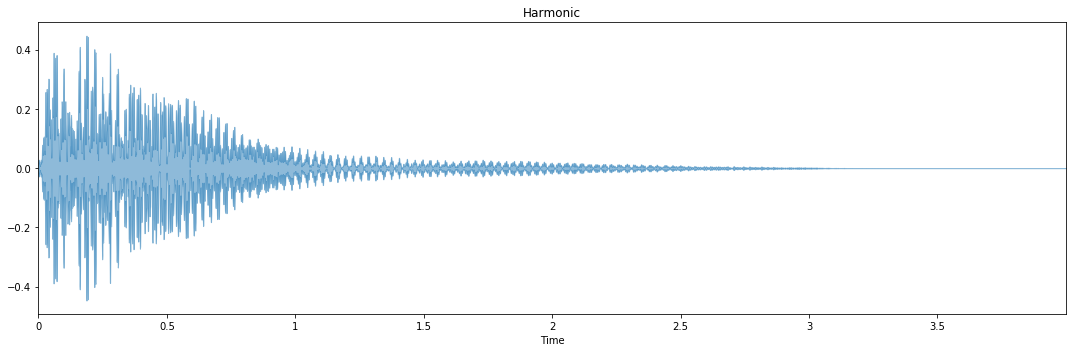

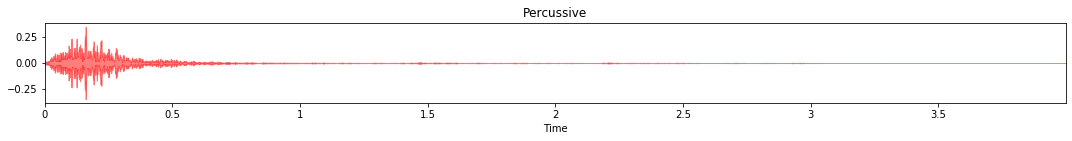

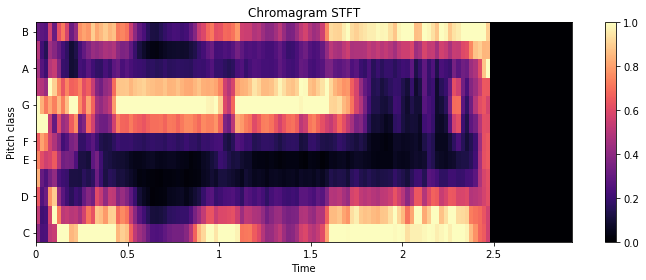

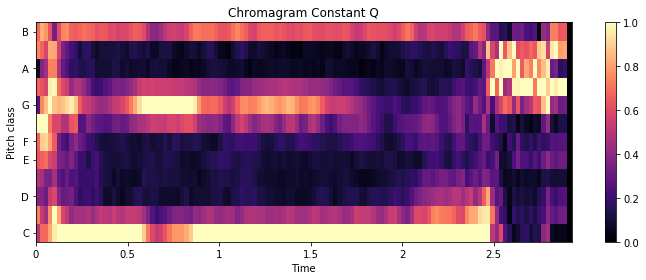

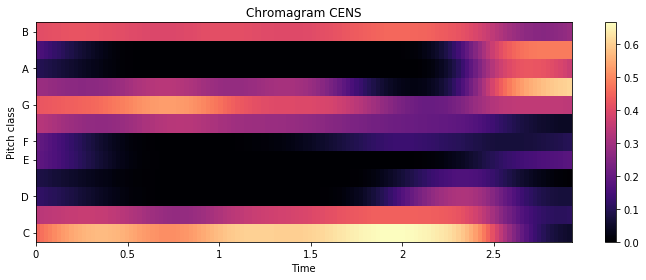

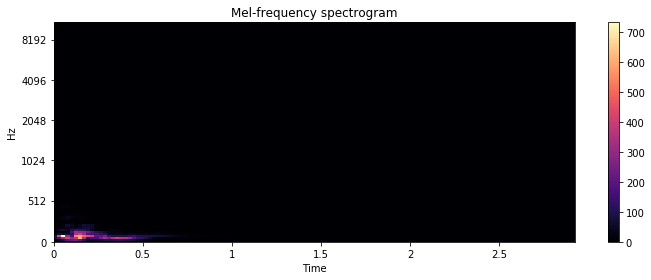

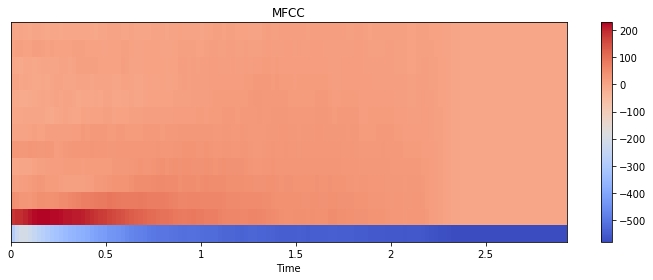

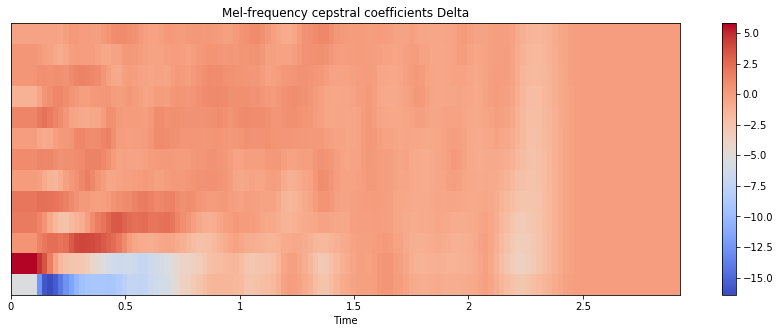

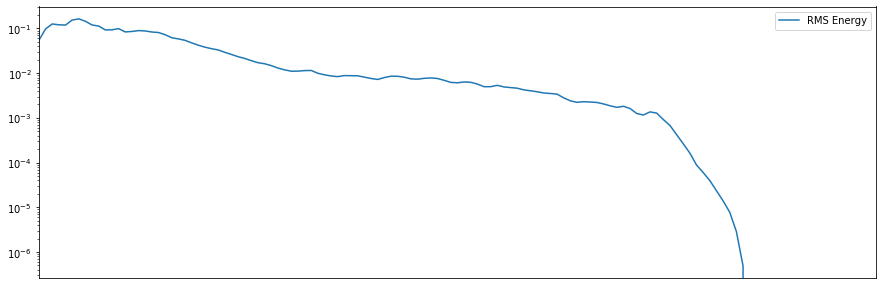

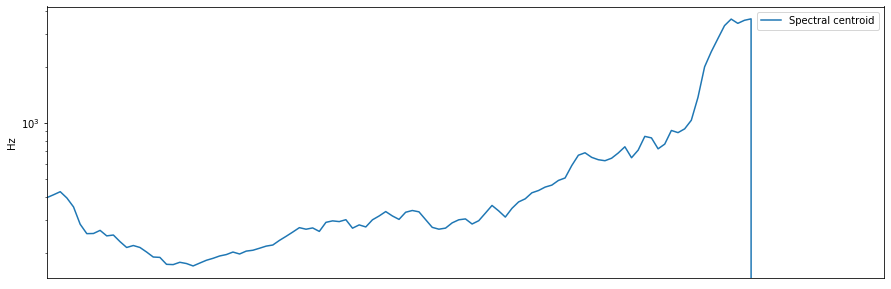

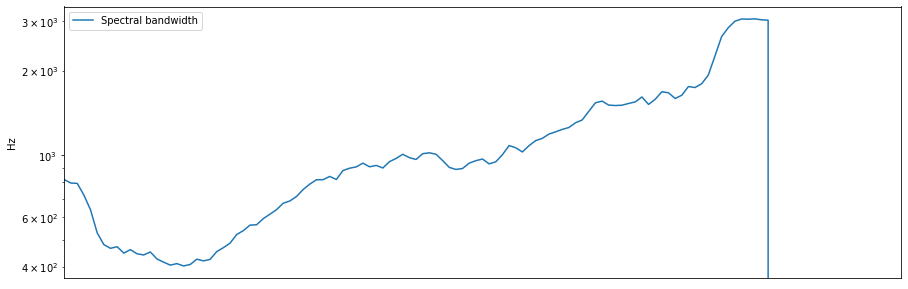

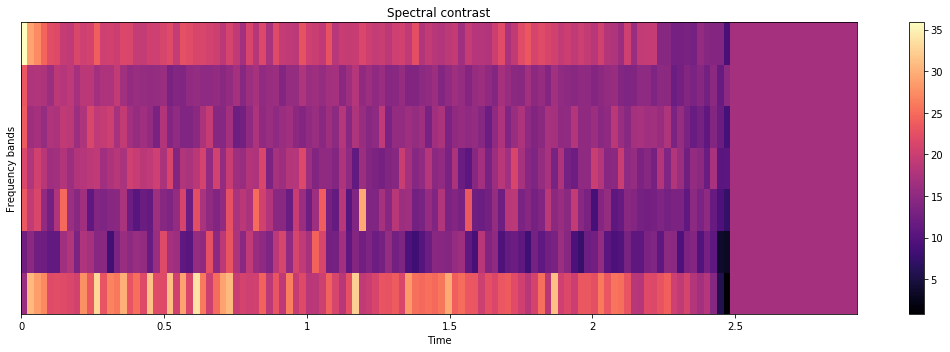

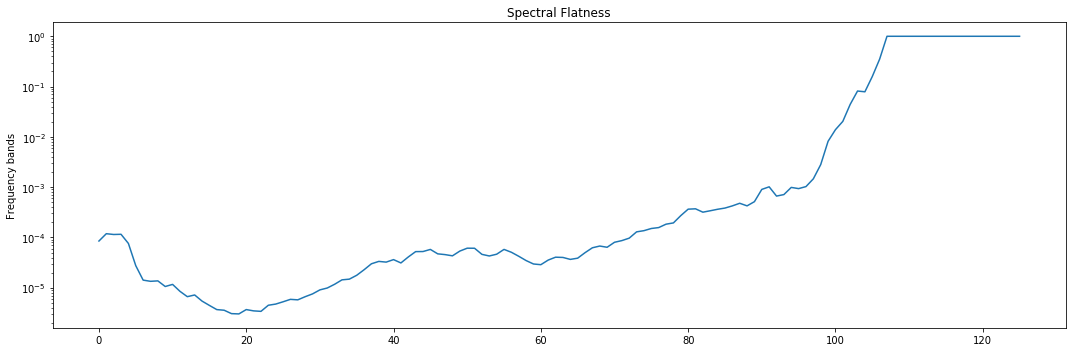

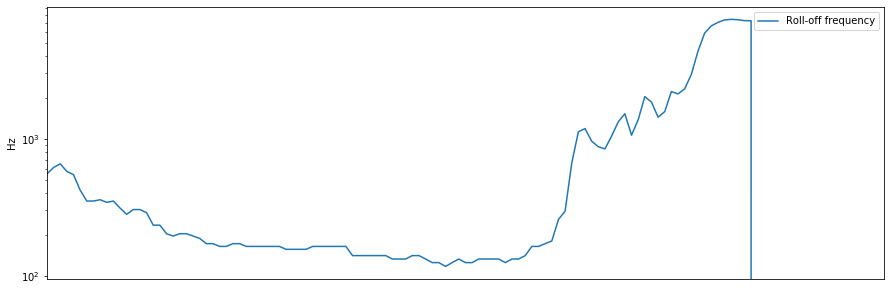

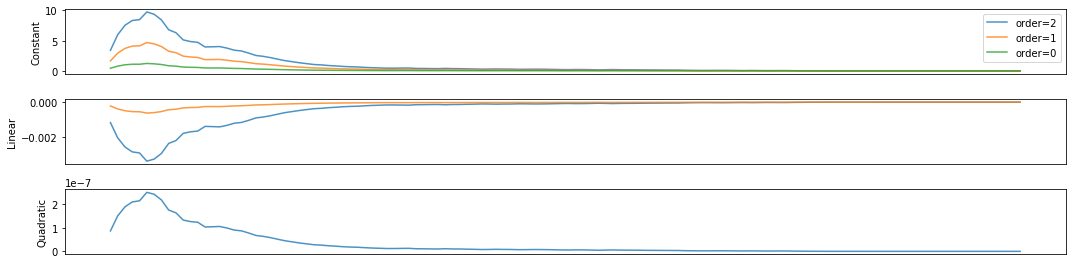

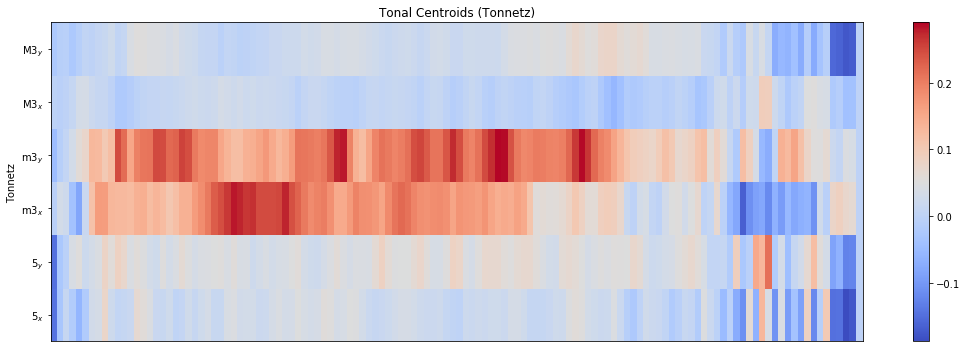

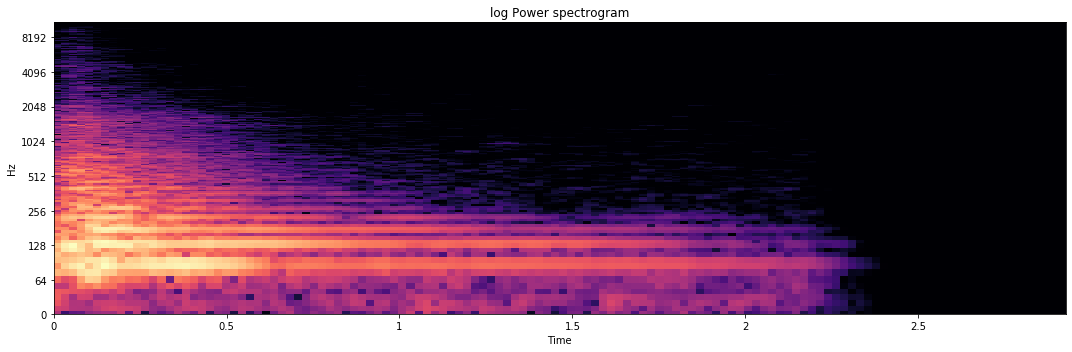

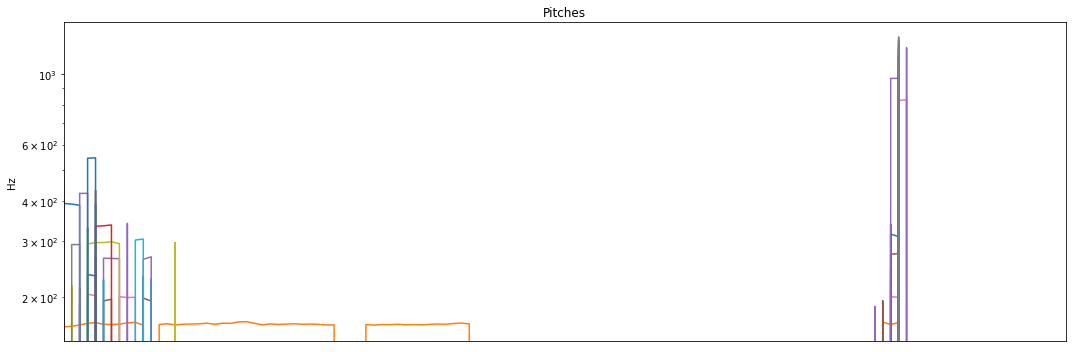

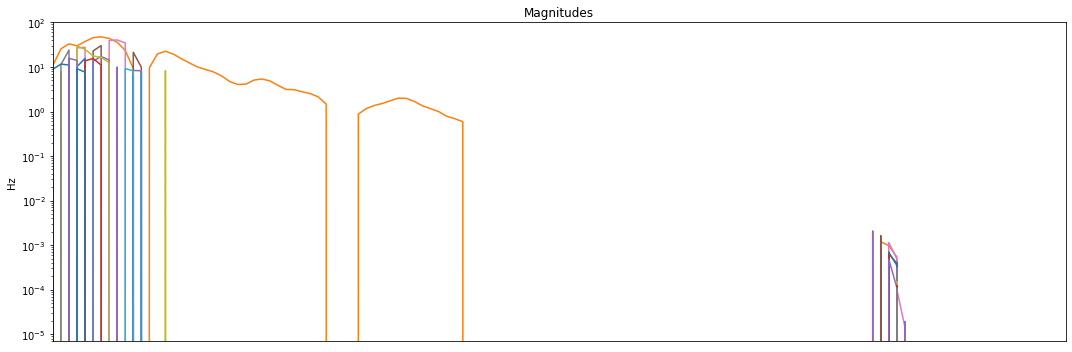

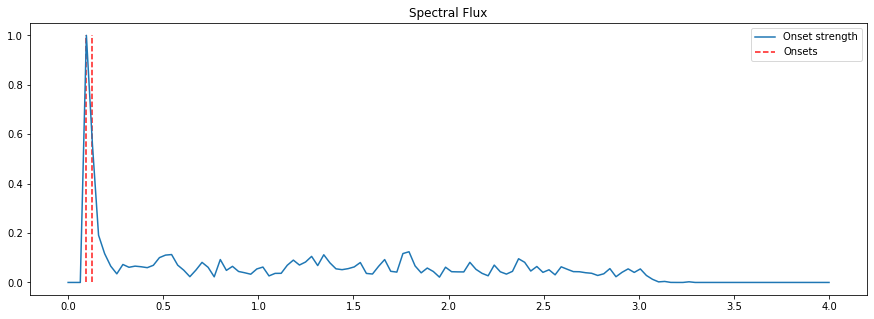

In [4]:
index = 0
plt.figure(index,figsize=(15,5))
librosa.display.waveplot(y_harmonic, sr=sr, alpha=0.5)
plt.title('Harmonic')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.subplot(3, 1, 1)
librosa.display.waveplot(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Percussive')
plt.tight_layout()
plt.show()

#Plot Chroma Graphs
index = 0
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram STFT')
plt.tight_layout()
plt.show()

index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.title('Chromagram Constant Q')
plt.colorbar()
plt.tight_layout()
plt.show()

index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.title('Chromagram CENS')
plt.colorbar()
plt.tight_layout()
plt.show()

#Plot Mel frequency Spectrogram
index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(mel_spec, x_axis='time',y_axis='mel')
plt.colorbar()
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

index += 1
plt.figure(index, figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(mfcc_delta, x_axis='time')
plt.colorbar()
plt.title('Mel-frequency cepstral coefficients Delta')
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(rms.T, label='RMS Energy')
plt.xticks([])
plt.xlim([0, rms.shape[-1]])
plt.legend()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spec_centroid.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_centroid.shape[-1]])
plt.legend()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spec_bandwidth.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_bandwidth.shape[-1]])
plt.legend()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(spec_contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spec_flatness.T, label='Spectral bandwidth')
plt.ylabel('Frequency bands')
plt.title('Spectral Flatness')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(spec_rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, spec_rolloff.shape[-1]])
plt.legend()
plt.show()

#Poly Features
index +=1
plt.figure(index, figsize=(15,5))
ax = plt.subplot(4,1,1)
plt.plot(p2[2], label='order=2', alpha=0.8)
plt.plot(p1[1], label='order=1', alpha=0.8)
plt.plot(p0[0], label='order=0', alpha=0.8)
plt.xticks([])
plt.ylabel('Constant')
plt.legend()
plt.subplot(4,1,2, sharex=ax)
plt.plot(p2[1], label='order=2', alpha=0.8)
plt.plot(p1[0], label='order=1', alpha=0.8)
plt.xticks([])
plt.ylabel('Linear')
plt.subplot(4,1,3, sharex=ax)
plt.plot(p2[0], label='order=2', alpha=0.8)
plt.xticks([])
plt.ylabel('Quadratic')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(tonnetz, y_axis='tonnetz')
plt.colorbar()
plt.title('Tonal Centroids (Tonnetz)')
plt.tight_layout()
plt.show()


index +=1
plt.figure(index, figsize=(15,5))
librosa.display.specshow(log_power, y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(pitches.T)
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, pitches.shape[-1]])
plt.title('Pitches')
plt.tight_layout()
plt.show()

index +=1
plt.figure(index, figsize=(15,5))
plt.semilogy(magnitudes.T)
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, magnitudes.shape[-1]])
plt.title('Magnitudes')
plt.tight_layout()
plt.show()


index +=1
plt.figure(index, figsize=(15,5))
plt.title('Spectral Flux')
plt.plot(times, onset_env, label='Onset strength')
plt.vlines(times[onset_frames], 0, onset_env.max(), color='r', alpha=0.9,
            linestyle='--', label='Onsets')
plt.axis('tight')
plt.legend(frameon=True, framealpha=0.75)
plt.show()

# Feature Extraction
This is the feature extraction used for instrument identification, the features used were selected through reading of articles and analyzing results of the sources below. The file's features are extracted and returned in an array.

#### Sources:
[MFCC, Mel Spec, Chroma Constant Q](https://www2.ak.tu-berlin.de/~akgroup/ak_pub/abschlussarbeiten/2018/Seipel_MasA.pdf)

[MFCC, Constant Q Transform](https://jamesowers.github.io/files/thesis.pdf)

[Analysis of MFCC Coefficients](http://www.haskins.yale.edu/sr/SR061/SR061_14.pdf)

[General Feature Extraction](https://medium.com/@nadimkawwa/can-we-guess-musical-instruments-with-machine-learning-afc8790590b8)

In [9]:
"""
Name: feature_extract
Input: String name of file to analyze
Returns: 
Array of:
    y_harmonic
    y_percussive 
    chroma_cens 
    chroma_cq 
    mfcc
    mel_spec
    spec_contrast
"""
def feature_extract(file):
    y, sr = librosa.load(file, sr=None)
    
    hop_length = 512
    
    # Separate harmonics and percussives into two waveforms
    y_harmonic, y_percussive = librosa.effects.hpss(y)    

    #Mel Spectrogram
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, 
                                                 fmax = 8000)
    #Mel-Frequency Cepstral Coefficients (MFCC) features from the raw signal
    mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=12)
    
    #Spectral Contrast
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    
    chroma_cens = librosa.feature.chroma_cens(y=y, sr=sr)
    
    #Constant Q chroma features from the harmonic signal
    chroma_cq = librosa.feature.chroma_cqt(y=y,
                                        sr=sr)

    y_harmonic = np.mean(y_harmonic)
    y_percussive = np.mean(y_percussive)
    mel_spec = np.mean(mel_spec, axis=1)
    mfcc = np.mean(mfcc, axis =1)
    #chroma_cens = np.mean(chroma_cens, axis=1)
    chroma_cq = np.mean(chroma_cq, axis=1)
    spec_contrast = np.mean(spec_contrast, axis=1)
    
    return [y_harmonic, y_percussive, chroma_cq, mfcc, mel_spec, 
            spec_contrast]